A91147501  
A12108176  
A12118052  

# Introduction and Background
In 2015, the City of San Diego conducted a resident satisfaction survey that assessed various aspects of living in San Diego. Residents provided an overall rating of the city of San Diego as a place to live as well as satisfaction ratings on specific city services and programs. 

By exploring these responses, we hope to find the most common causes of resident dissatisfaction and which neighborhoods they are most prominent in. As students of UC San Diego in the affluent La Jolla neighborhood, we have become accustomed to living inside a “bubble” of privilege, but as members of the community, we believe that uncovering these truths will be useful to future development plans for the university and the city.

#### Research Question:
What factors of living in San Diego contribute most to resident dissatisfaction? What kinds of neighborhoods are unsatisfactory, and why?

#### Hypothesis:
We predict that residents in communities with lower housing prices will have lower overall resident satisfaction. We hypothesize that factors such as the proximity to different resources and the maintenance of services the city provides correlate with resident satisfaction.

# Data Description

<b>Name</b>: Resident Satisfaction Survey Results  
<b>Link to the dataset:</b> https://data.sandiego.gov/datasets/resident-satisfaction-survey/  
<b>Number of observations:</b> 2478  
<b>Description:</b> This dataset contains the results of 2,478 surveys conducted on San Diego residents. The survey assessed satisfaction with the delivery of City programs, services, staff and preferences about how City officials should prioritize programs and services. Each survey contained 28 questions and the zip code of each respondent is provided.

<b>Name:</b> Median Housing Prices by Zip Code  
<b>Link to the dataset:</b> https://query.data.world/s/4YkmYcRnpcRqTmJ9qWn5KRALu157jX  
<b>Description:</b> This dataset contains the monthly median housing prices of listings on Zillow, the leading online real estate database. 

In [101]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [102]:
#Read in income data
avg_house_prices = pd.read_csv('https://query.data.world/s/4YkmYcRnpcRqTmJ9qWn5KRALu157jX')
avg_house_prices = avg_house_prices[avg_house_prices['CountyName'] == 'San Diego'] 

#Extract zipcode, city, 2017-09 column
avg_house_prices = avg_house_prices[['RegionName', 'City', '2017-09']]
len(avg_house_prices)



79

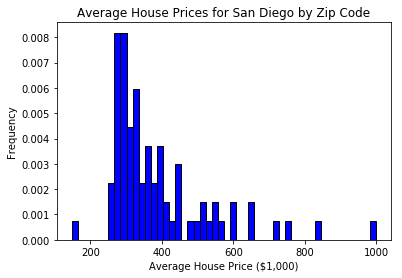

In [103]:
#Plot histogram of avg house prices
histogram = plt.hist(avg_house_prices['2017-09'], 50, edgecolor='black', facecolor='blue',normed=1)
plt.xlabel('Average House Price ($1,000)')
plt.ylabel('Frequency')
plt.title('Average House Prices for San Diego by Zip Code')

f1 = plt.gcf()

In [104]:
#Original df
df = pd.read_csv("resident_survey_weighted_datasd.csv")

#Create new df (data) that we will drop columns from
data = pd.read_csv("resident_survey_weighted_datasd.csv")


In [105]:
#Extract questions that ask residents to rate their satisfaction on a topic from 1-5
data.drop(data.columns[99:], axis=1, inplace=True)
data.drop(data.columns[0:7], axis=1, inplace=True)
#data.head(5)

data.drop(data.filter(like='Q4', axis=1), axis=1, inplace=True)
data.drop(data.filter(like='Q5', axis=1), axis=1, inplace=True)
data.drop(data.filter(like='Q10', axis=1), axis=1, inplace=True)
#data.head(5)

In [106]:
#Find total surveys submitted per zip code
total_zip = pd.DataFrame(df['ZIP'].value_counts())

#Only keep zipcodes who submitted more than 20 surveys
#total_zip = total_zip[total_zip['ZIP'] > 20]

#Convert total_zip to a dataframe, tell me if yall know a better way to do this
total_zip.index.name = 'x'
total_zip.reset_index(inplace=True)
total_zip.columns = ['ZIP', 'count']

#Add zipcode column back into data
data['ZIP'] = df['ZIP']

#Drop all rows whose zipcode has <20 surveys
data = data[data['ZIP'].isin(total_zip['ZIP'])].dropna()



In [107]:
#Find 20 questions with the lowest average rating
mean = data.mean()
bottom_20 = mean.nsmallest(n=20, keep='first')
#print(bottom_20)


In [108]:
#Read in survey questions
questions = pd.read_csv("resident_survey_dictionary_datasd.csv")
#questions.head(5)


In [109]:
#Locate questions 
Q1 = (questions.loc[questions['question_number']=='Q8_3'])['question_text']
Q2 = (questions.loc[questions['question_number']=='Q3_8'])['question_text']
Q3 = (questions.loc[questions['question_number']=='Q8_4'])['question_text']
Q4 = (questions.loc[questions['question_number']=='Q8_10'])['question_text']
Q5 = (questions.loc[questions['question_number']=='Q14_14'])['question_text']
Q6 = (questions.loc[questions['question_number']=='Q8_7'])['question_text']
Q7 = (questions.loc[questions['question_number']=='Q2_7'])['question_text']
Q8 = (questions.loc[questions['question_number']=='Q8_8'])['question_text']
Q9 = (questions.loc[questions['question_number']=='Q14_3'])['question_text']
Q10 = (questions.loc[questions['question_number']=='Q8_9'])['question_text']
Q11 = (questions.loc[questions['question_number']=='Q8_2'])['question_text']
Q12 = (questions.loc[questions['question_number']=='Q2_6'])['question_text']
Q13 = (questions.loc[questions['question_number']=='Q8_5'])['question_text']
Q14 = (questions.loc[questions['question_number']=='Q2_3'])['question_text']
Q15 = (questions.loc[questions['question_number']=='Q6_5'])['question_text']
Q16 = (questions.loc[questions['question_number']=='Q3_2'])['question_text']
Q17 = (questions.loc[questions['question_number']=='Q3_9'])['question_text']
Q18 = (questions.loc[questions['question_number']=='Q8_6'])['question_text']
Q19 = (questions.loc[questions['question_number']=='Q3_14'])['question_text']
Q20 = (questions.loc[questions['question_number']=='Q6_4 '])['question_text']

print(Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20)

54    Condition and maintenance of City streets
Name: question_text, dtype: object 23    Maintenance of City streets, sidewalks, and in...
Name: question_text, dtype: object 55    Condition and maintenance of streets in YOUR n...
Name: question_text, dtype: object 61    Quality of street repairs
Name: question_text, dtype: object 106    Quality/variety of entertainment, expositions,...
Name: question_text, dtype: object 58    Condition of sidewalks in the City
Name: question_text, dtype: object 14    Value that you receive for your City tax dolla...
Name: question_text, dtype: object 59    Condition of sidewalks in YOUR neighborhood
Name: question_text, dtype: object 95    Ease of obtaining permits from Development Ser...
Name: question_text, dtype: object 60    Efforts to keep streets clean (i.e., street sw...
Name: question_text, dtype: object 53    Availability of street lights in YOUR neighbor...
Name: question_text, dtype: object 13    Quality of services provided by the City
Name

In [110]:
#Extract Q8_3 (Condition and maintenance of City streets)
Q8_3 = pd.DataFrame(data.loc[:,'Q8_3'])
Q8_3['ZIP'] = data['ZIP']
#Q8_3.head(5)

#Find average rating on Q8_3 per zip code
avg_ratings_per_zip_q83 = Q8_3.groupby('ZIP', as_index=False)['Q8_3'].mean()
#avg_ratings_per_zip_q83.head()

#FOR GEOGRAPH: Extract 5 zipcodes with lowest average rating
lowest_q83 = avg_ratings_per_zip_q83.nsmallest(n=5, columns='Q8_3', keep='first')



In [111]:
#Create dataframe with zipcode, average rating for Q8_3, and avg house prices 2017-09
Q8_3_rating_price = avg_ratings_per_zip_q83.merge(avg_house_prices, left_on='ZIP', right_on='RegionName')
Q8_3_rating_price = Q8_3_rating_price[['ZIP','Q8_3', '2017-09']]
Q8_3_rating_price.set_index('ZIP', inplace=True)

#Compute correlation between avg rating and avg house price
Q8_3_corr = Q8_3_rating_price.corr()
Q8_3_corr


,Q8_3,2017-09
Q8_3,1.000000,-0.037873
2017-09,-0.037873,1.000000


Text(0.5,1,'Average Rating on Q8_3 vs. Average House Price')

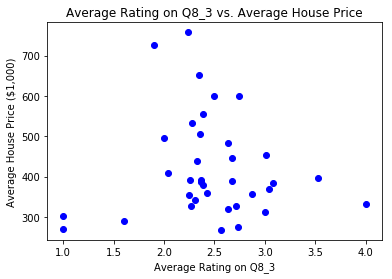

In [112]:
#Plot scatterplot of avg rating vs avg house price
Q8_3_scatter = plt.scatter(Q8_3_rating_price['Q8_3'], Q8_3_rating_price['2017-09'], c='blue')
plt.xlabel('Average Rating on Q8_3')
plt.ylabel('Average House Price ($1,000)')
plt.title('Average Rating on Q8_3 vs. Average House Price')

In [113]:
#Extract Q3_8 (Maintenance of City streets, sidewalks, and infrastructure)
Q3_8 = pd.DataFrame(data.loc[:,'Q3_8'])
Q3_8['ZIP'] = data['ZIP']

#Find average rating on Q8_3 per zip code
avg_ratings_per_zip_q38 = Q3_8.groupby('ZIP', as_index=False)['Q3_8'].mean()

#Extract 5 zipcodes with lowest average rating
lowest_q38 = avg_ratings_per_zip_q38.nsmallest(n=5, columns='Q3_8', keep='first')
len(avg_ratings_per_zip_q38)

47

In [114]:
#Extract Q8_4 (Quality of street repairs)
Q8_4 = pd.DataFrame(data.loc[:,'Q8_4'])
Q8_4['ZIP'] = data['ZIP']

#Find average rating on Q8_3 per zip code
avg_ratings_per_zip_q84 = Q8_4.groupby('ZIP', as_index=False)['Q8_4'].mean()

#Extract 5 zipcodes with lowest average rating
lowest_q84 = avg_ratings_per_zip_q84.nsmallest(n=5, columns='Q8_4', keep='first')
print(lowest_q84)


      ZIP      Q8_4
3   91945  1.000000
4   91950  1.000000
7   92081  1.000000
8   92093  1.000000
17  92109  1.921348
